# 8 - Validation

### Accuracy

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

In [27]:
accuracy_score(y_true, y_pred)

0.5

In [28]:

accuracy_score(y_true, y_pred, normalize=False)

2.0

### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [30]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
confusion_matrix(y_true, y_pred, normalize='all')  

array([[0.25 , 0.125],
       [0.25 , 0.375]])

In [31]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp 

(np.int64(2), np.int64(1), np.int64(2), np.int64(3))

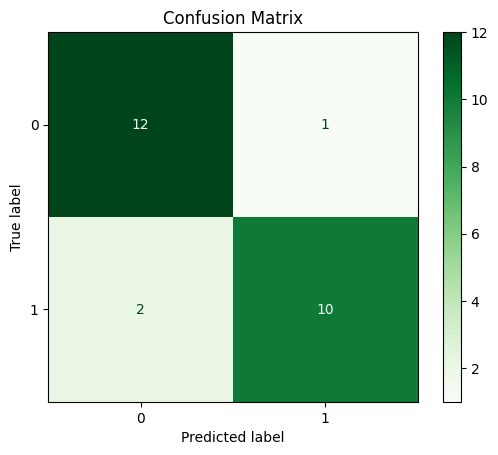

In [32]:
# CONFUSION MATRIX DISPLAY 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

# 9 - Validation in regression cases

<b style="color:red">NOTE:</b> this code is not the same as the original notes. They seem to be not right coded and maybe deprecated in some cases

In [33]:
from sklearn.metrics import max_error
max_error(y_true, y_pred) 

np.int64(1)

In [34]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_true, y_pred, multioutput='raw_values')  

array([0.])

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

0.375

In [36]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_true, y_pred)  

0.1801698802193255

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true,y_pred)

562949953421312.2

##### [Synthetic example](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py)

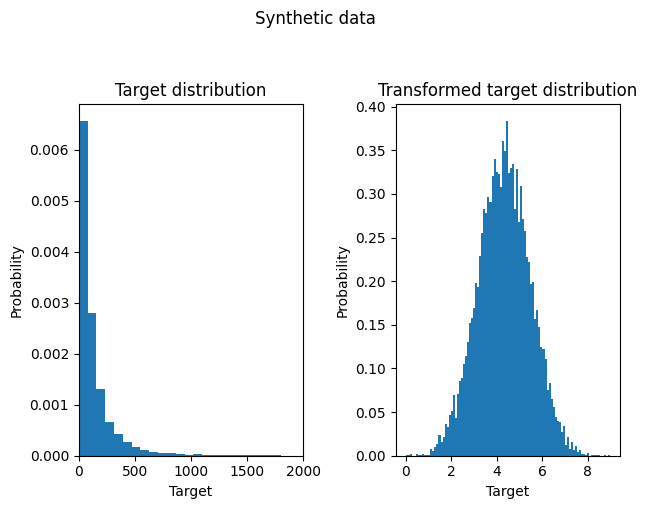

In [38]:
import numpy as np

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10_000, noise=100, random_state=0)
y = np.expm1((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, density=True)
ax0.set_xlim([0, 2000])
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.set_title("Target distribution")

ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.set_title("Transformed target distribution")

f.suptitle("Synthetic data", y=1.05)
plt.tight_layout()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 10 - Cluster analysis Validation

### Internal validation

In [39]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(X)
labels=kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')  

np.float64(0.006351732037190772)

In [40]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(X)
labels=kmeans_model.labels_
metrics.calinski_harabasz_score(X,labels)  

np.float64(54.23487038131069)

### External validation

In [42]:
from sklearn import metrics

# Example true and predicted labels
labels_true = [0, 0, 1, 1, 2, 2]
labels_pred = [0, 0, 1, 2, 2, 2]

# Calculate the Rand Index
rand_index = metrics.rand_score(labels_true, labels_pred)
print(f"Rand Index: {rand_index}")

Rand Index: 0.8


In [43]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels_pred) 

0.4444444444444444